# Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms

**Name:** Milan Bista  
**Course:** MSCS 634 - Data Science  
**Assignment:** Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms
**Date:** 6/14/2025

## Lab Overview
This lab will explore clustering techniques using the Wine Dataset from sklearn Python library. You will apply both K-Means and K-Medoids algorithms to analyze and compare the clustering performance. 
## Dataset Information
- **Source:** Wine Dataset from sklearn Python library


In [11]:
# Step 1: Load and Prepare Dataset
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Exploration
print("Feature Names:", wine.feature_names)
print("Target Classes:", np.unique(y))
print("Class Distribution:\n", pd.Series(y).value_counts())

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Classes: [0 1 2]
Class Distribution:
 1    71
0    59
2    48
dtype: int64


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

print(X_scaled.shape)
# K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluation
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"K-Means Adjusted Rand Index: {kmeans_ari:.4f}")


(178, 13)
K-Means Silhouette Score: 0.2849
K-Means Adjusted Rand Index: 0.8975


In [6]:
!pip install scikit-learn-extra


In [13]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score

# K-Medoids with k=3
kmedoids = KMedoids(n_clusters=3, random_state=42, metric='euclidean')
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Evaluation
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(y, kmedoids_labels)

print(f"K-Medoids Silhouette Score: {kmedoids_silhouette:.4f}")
print(f"K-Medoids Adjusted Rand Index: {kmedoids_ari:.4f}")


K-Medoids Silhouette Score: 0.2660
K-Medoids Adjusted Rand Index: 0.7263


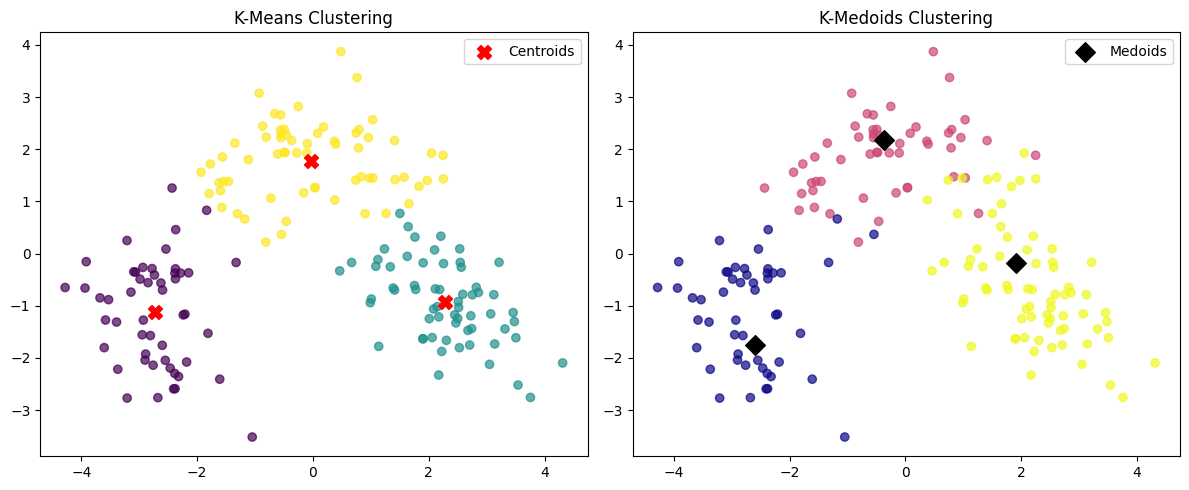

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(12, 5))

# K-Means Plot
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.legend()

# K-Medoids Plot
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='plasma', alpha=0.7)
medoids = pca.transform(X_scaled[kmedoids.medoid_indices_])
plt.scatter(medoids[:, 0], medoids[:, 1], c='black', marker='D', s=100, label='Medoids')
plt.title('K-Medoids Clustering')
plt.legend()

plt.tight_layout()
plt.show()
